### 用 scikitlearn 实现交叉验证

#### 为什么是 8 / 2 分？
一般地我们要留有足够的数据 用于测试 
#### 那多少是足够的呢？ 
    取决于数据集的大小 模型架构 和通用型 8/2 分 是随意的分割.
    如果你有非常庞大的数据 98/1/1 通常是最好的选择

In [11]:
import torch
import torch.nn as nn 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')

data = torch.tensor(iris[iris.columns[0:4]].values).float()

labels = torch.zeros(len(data),dtype=torch.long)

labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2


In [12]:

fakedata = np.tile(np.array([1,2,3,4]),(10,1)) + np.tile(10*np.arange(1,11),(4,1)).T

fakelabels = np.arange(10) >4
print(fakedata)
fakelabels

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]


array([False, False, False, False, False,  True,  True,  True,  True,
        True])

In [4]:
# # use scikitlearn to split the data
# train_data, test_data,train_labels,test_labels = train_test_split(
#     fakedata,fakelabels,test_size=.2,shuffle= True
# )

# # .2 是测试数据比列，剩下的.8 是训练数据的比例
# # shuffle 是否随机调换位置

# print('train data size' + str(train_data.shape))

# print(train_data)
# print(test_data)


In [10]:
# now back to the model

def createANN():
    ANNiris = nn.Sequential(
        nn.Linear(4,64),
        nn.ReLU(),
        nn.Linear(64,64),
        nn.ReLU(),
        nn.Linear(64,3)
    )

    lossfun = nn.CrossEntropyLoss()

    optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.01)

    return ANNiris ,lossfun,optimizer


numepochs = 200

def trainTheModel(trainProp):

    losses = torch.zeros(numepochs)

    trainAcc = []
    testAcc= []
    # 
    x_train,x_test,y_train,y_test = train_test_split(data,labels,train_size=trainProp)

    for epochi in range(numepochs):

        # 每一次训练都会单独分割数据
        # 这里我们指定了 训练的数据大小 ，而不是测试集的大小
        # x_train,x_test,y_train,y_test = train_test_split(data,labels,train_size=trainProp)


        yHat= ANN(x_train)      
        loss = LOSS(yHat,y_train)

        # backprop
        OPT.zero_grad()
        loss.backward()
        OPT.step()

        trainAcc.append(100*torch.mean((torch.argmax(yHat,axis =1) == y_train).float()).item())

        predlabels = torch.argmax(ANN(x_test),axis= 1)
        testAcc.append(100 * torch.mean((predlabels == y_test).float()).item())

    return trainAcc,testAcc


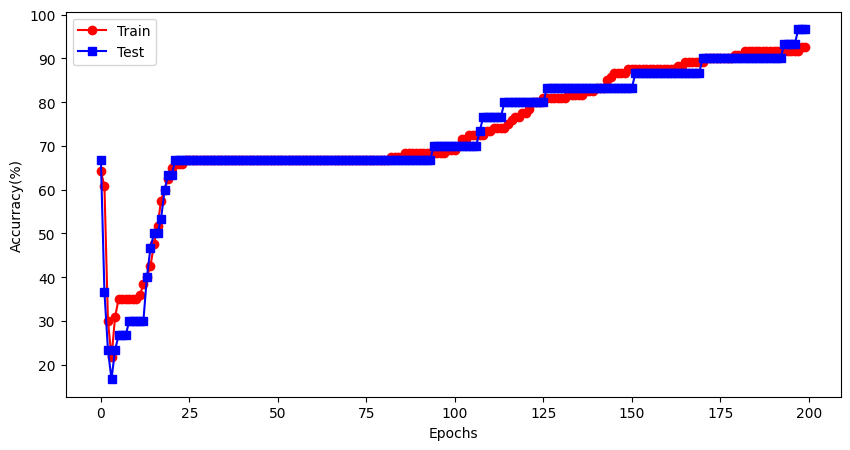

In [6]:


ANN,LOSS,OPT = createANN()

trainAcc,testAcc = trainTheModel(.8)

fig = plt.figure(figsize=(10,5))

plt.plot(trainAcc,'ro-')
plt.plot(testAcc,'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accurracy(%)')
plt.legend(['Train','Test'])
plt.show()


In [13]:
# now for the experiment 
trainSetSizes = np.linspace(.2,.95,10)

allTrainAcc = np.zeros((len(trainSetSizes),numepochs))
allTestAcc = np.zeros((len(trainSetSizes),numepochs))

for i in range(len(trainSetSizes)):
    
    ANN,LOSS,OPT = createANN()

    trainAcc ,testAcc = trainTheModel(trainSetSizes[i])

    allTrainAcc[i,:] =trainAcc
    allTestAcc[i,:] = testAcc

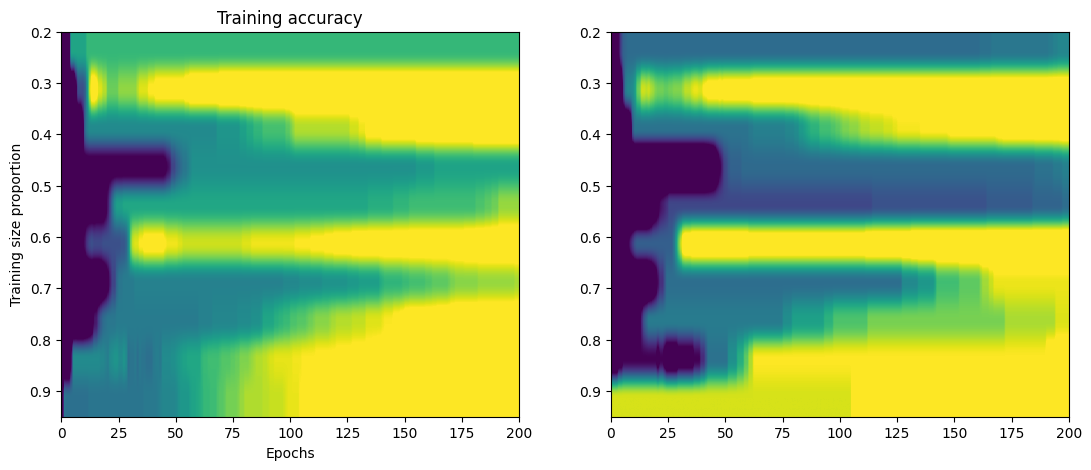

In [8]:


fig,ax = plt.subplots(1,2,figsize=(13,5))
ax[0].imshow(allTrainAcc,aspect='auto',
            vmin =50,vmax=90,extent=[0,numepochs,trainSetSizes[-1],trainSetSizes[0]] 
             )
ax[0].set_xlabel('Epochs')

ax[0].set_ylabel('Training size proportion')
ax[0].set_title('Training accuracy')

p = ax[1].imshow(allTestAcc,aspect= 'auto',
            vmin = 50,vmax =90,extent=[0,numepochs,trainSetSizes[-1],trainSetSizes[0]]     
                 )



